In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

### Loading Data

In [2]:
df = pd.read_csv("vehicles_maindata.csv")

In [3]:
# Main Dataset
df.columns

Index(['Unnamed: 0', 'id', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'type', 'area'],
      dtype='object')

### Data Selection

In [4]:
# Select columns for prediction with Decision Tree Regressor
df_1 = df.loc[:,['price', 'year', 'manufacturer', 
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'type','area']]

In [5]:
df_1.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,area
0,15000,2013-01-01,ford,excellent,6,gas,128000.0,clean,automatic,rwd,truck,south
1,27990,2012-01-01,gmc,good,8,gas,68696.0,clean,other,4wd,pickup,south
2,34590,2016-01-01,chevrolet,good,6,gas,29499.0,clean,other,4wd,pickup,south
3,35000,2019-01-01,toyota,excellent,6,gas,43000.0,clean,automatic,4wd,truck,south
4,29990,2016-01-01,chevrolet,good,6,gas,17302.0,clean,other,4wd,pickup,south


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103577 entries, 0 to 103576
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         103577 non-null  int64  
 1   year          103577 non-null  object 
 2   manufacturer  103577 non-null  object 
 3   condition     103577 non-null  object 
 4   cylinders     103577 non-null  int64  
 5   fuel          103577 non-null  object 
 6   odometer      103577 non-null  float64
 7   title_status  103577 non-null  object 
 8   transmission  103577 non-null  object 
 9   drive         103577 non-null  object 
 10  type          103577 non-null  object 
 11  area          103577 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 9.5+ MB


### Data Transformation

In [7]:
# perform data transformation for Linear Regression Model
for col in df_1.columns[1:]:
    attName = col
    dType = df_1[col].dtype
    missing = pd.isnull(df_1[col]).any()
    uniqueCount = len(df_1[attName].value_counts(normalize=False))
# discretize (create dummies)
    if dType == object:
        df_1 = pd.concat([df_1, pd.get_dummies(df_1[col], prefix=col)], axis=1)
        del df_1[attName]

In [8]:
df_1.head()

,price,cylinders,odometer,year_2001-01-01,year_2002-01-01,year_2003-01-01,year_2004-01-01,year_2005-01-01,year_2006-01-01,year_2007-01-01,...,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,area_mw,area_ne,area_south,area_west
0,15000,6,128000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,27990,8,68696.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,34590,6,29499.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,35000,6,43000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,29990,6,17302.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Split Training and Testing Data

In [9]:
# Create features and target
X = df_1.copy().drop('price', axis=1)
X=pd.get_dummies(X)

# Create our target
y = df_1['price']

In [10]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=1)

# DecisionTreeRegressor

### Loading Model

In [11]:
# Create a machine learning model
regr = DecisionTreeRegressor()

In [12]:
# Make an object pipe to create pipeline for regr
pipe = Pipeline(steps=[('regr',regr)])

In [13]:
# Set parameters as value list from which GridSearchCV will select best value
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [14]:
# Create dictionary to set parameters
parameters = dict(regr__max_depth=max_depth)

In [15]:
# Create GridSearchCV object and fot dataset i.e., X and y
pred = GridSearchCV(pipe, parameters)
pred.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('regr', DecisionTreeRegressor())]),
             param_grid={'regr__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                             12, 13, 14, 15]})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [16]:
# Print result 
print(); print(pred.best_estimator_.get_params()['regr'])


DecisionTreeRegressor(max_depth=15)


### Prediction on Testing Data

In [17]:
# Make prediction
best_regr = DecisionTreeRegressor(max_depth=15)
best_regr.fit(X_train, y_train)
y_pred_15 = best_regr.predict(X_test)

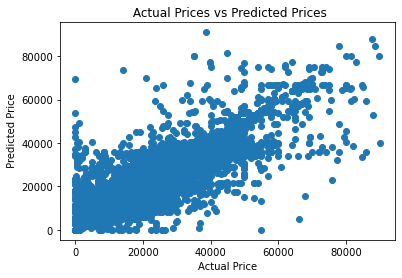

In [18]:
# Visual for testing data
plt.scatter(y_test,y_pred_15)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [19]:
# Result of prediction
data = {'price': y_test,
       'prediction': y_pred_15}
df_pred = pd.DataFrame(data).round(2)
df_pred

,price,prediction
26715,6700,10973.22
64705,7400,8329.22
100052,39990,40199.39
31942,14500,19400.00
58440,6900,5475.37
...,...,...
63710,9983,9093.66
65996,21500,15474.50
66959,488,10389.00
6086,10450,9302.92


### Prediction On Training  Data

In [20]:
# Make prediction training 
best_regr = DecisionTreeRegressor(max_depth=15)
best_regr.fit(X_train, y_train)
y_train_pred_15 = best_regr.predict(X_train)

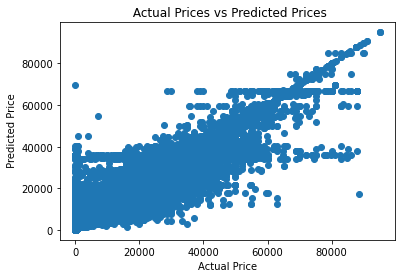

In [21]:
# Visual for training data
plt.scatter(y_train,y_train_pred_15)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [22]:
# Result of prediction on training data
data = {'price': y_train,
       'prediction': y_train_pred_15}
df_pred = pd.DataFrame(data).round(2)
df_pred

,price,prediction
95264,19995,21145.40
35690,34590,33894.35
1098,25990,29121.01
74694,28900,28540.26
28188,34590,35989.10
...,...,...
50057,4495,7316.39
98047,41990,40199.39
5192,11995,8344.98
77708,7499,5634.45


### DecisionTreeRegressor Model Evaluation: Max Depth 15

In [23]:
# r2 evaluation
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred_15),
                r2_score(y_test, y_pred_15)))

R^2 train: 0.882, test: 0.824


# Linear Regression Model

### Loading Model

In [24]:
# Loadinf the Linear Regression model
lin_reg_model = LinearRegression()

### Fitting Data

In [25]:
#fitting data to the linear Regression model
lin_reg_model.fit(X_train, y_train)

LinearRegression()

### Prediction on testing data

In [26]:
# prediction on Testing data
y_ln_test_pred = lin_reg_model.predict(X_test)

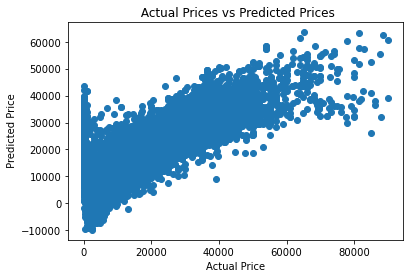

In [27]:
# Visual for testing data
plt.scatter(y_test,y_ln_test_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [28]:
# Result of prediction on testing data
data = {'price': y_test,
       'prediction': y_ln_test_pred}
df_pred = pd.DataFrame(data).round(2)
df_pred

,price,prediction
26715,6700,10161.60
64705,7400,9221.51
100052,39990,34024.31
31942,14500,18524.20
58440,6900,2927.99
...,...,...
63710,9983,11411.35
65996,21500,25640.82
66959,488,11890.37
6086,10450,12541.94


### Prediction on training data

In [29]:
# prediction on Training data
y_ln_train_pred = lin_reg_model.predict(X_train)

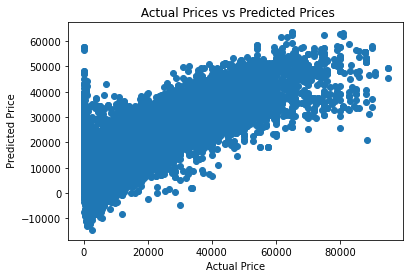

In [30]:
# Visual for training data
plt.scatter(y_train,y_ln_train_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [31]:
# Result of prediction on training data
data = {'price': y_train,
       'prediction': y_ln_train_pred}
df_pred = pd.DataFrame(data).round(2)
df_pred

,price,prediction
95264,19995,22533.52
35690,34590,30629.82
1098,25990,28157.51
74694,28900,27158.03
28188,34590,31459.94
...,...,...
50057,4495,3895.22
98047,41990,31122.40
5192,11995,11692.45
77708,7499,5916.42


In [32]:
# Prediction Score 
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_ln_train_pred),
                r2_score(y_test, y_ln_test_pred)))

R^2 train: 0.757, test: 0.754


###  

# Comparison between two Models

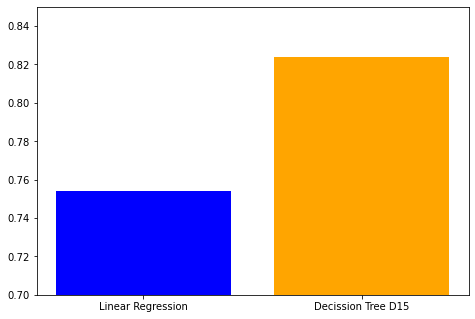

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['Linear Regression', 'Decission Tree D15' ]
R2 = [r2_score(y_test, y_ln_test_pred), r2_score(y_test, y_pred_15)]
c = ['blue', 'orange']
ax.bar(Models, R2, color= c)
plt.ylim([0.7, 0.85])
plt.show()